# 01 - Multivariate Time Series Data Exploration

This notebook focuses on:
1. Loading and exploring multivariate time series datasets
2. Understanding multiple features per time step
3. Feature relationships and correlations
4. Time series characteristics and patterns
5. Data quality assessment and preprocessing

## Execution Order:
- **Cell 1**: Import libraries
- **Cell 2**: Dataset selection and configuration
- **Cell 3**: Load and preprocess data
- **Cell 4**: Data quality assessment
- **Cell 5**: Data visualization
- **Cell 6**: Time series split and preparation
- **Cell 7**: Summary and next steps


In [1]:
# Cell 1: Import Libraries
print("=== IMPORTING LIBRARIES ===")

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta

# Set plotting style
plt.style.use('seaborn')
sns.set_palette("husl")

print("✅ All imports completed successfully!")


=== IMPORTING LIBRARIES ===
✅ All imports completed successfully!


In [2]:
# Cell 2: Dataset Selection and Configuration
print("=== MULTIVARIATE TIME SERIES DATASET SELECTION ===")

# Available monitoring stations
stations = {
    'Aotizhongxin': 'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'Changping': 'PRSA_Data_Changping_20130301-20170228.csv',
    'Dingling': 'PRSA_Data_Dingling_20130301-20170228.csv',
    'Dongsi': 'PRSA_Data_Dongsi_20130301-20170228.csv',
    'Guanyuan': 'PRSA_Data_Guanyuan_20130301-20170228.csv',
    'Gucheng': 'PRSA_Data_Gucheng_20130301-20170228.csv',
    'Huairou': 'PRSA_Data_Huairou_20130301-20170228.csv',
    'Nongzhanguan': 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'Shunyi': 'PRSA_Data_Shunyi_20130301-20170228.csv',
    'Tiantan': 'PRSA_Data_Tiantan_20130301-20170228.csv',
    'Wanliu': 'PRSA_Data_Wanliu_20130301-20170228.csv',
    'Wanshouxigong': 'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
}

# Dataset configuration
dataset_config = {
    'name': 'Beijing Multi-Site Air-Quality Data',
    'features': ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
    'target': 'PM2.5',
    'time_col': 'datetime'
}

print("Available monitoring stations:")
for i, (station_name, filename) in enumerate(stations.items(), 1):
    print(f"{i:2d}. {station_name}")
print()

# Select station (default to Aotizhongxin)
selected_station = 'Aotizhongxin'  # Change this to select a different station
selected_file = stations[selected_station]

print(f"Selected station: {selected_station}")
print(f"File: {selected_file}")
print(f"Target variable: {dataset_config['target']}")
print(f"Number of features: {len(dataset_config['features'])}")

# Create dataset info for compatibility
dataset_info = {
    'name': f"{dataset_config['name']} - {selected_station}",
    'file': f'../data_multivariate/{selected_file}',
    'features': dataset_config['features'],
    'target': dataset_config['target'],
    'time_col': dataset_config['time_col'],
    'station': selected_station
}

print(f"\n✅ Dataset configuration completed!")


=== MULTIVARIATE TIME SERIES DATASET SELECTION ===
Available monitoring stations:
 1. Aotizhongxin
 2. Changping
 3. Dingling
 4. Dongsi
 5. Guanyuan
 6. Gucheng
 7. Huairou
 8. Nongzhanguan
 9. Shunyi
10. Tiantan
11. Wanliu
12. Wanshouxigong

Selected station: Aotizhongxin
File: PRSA_Data_Aotizhongxin_20130301-20170228.csv
Target variable: PM2.5
Number of features: 11

✅ Dataset configuration completed!


In [3]:
# Cell 3: Load and Preprocess Data
print("=== LOADING AND PREPROCESSING DATA ===")

try:
    # Load the dataset
    df = pd.read_csv(dataset_info['file'])
    print(f"✅ Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    # Handle time column
    if 'year' in df.columns and 'month' in df.columns and 'day' in df.columns and 'hour' in df.columns:
        df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
        df = df.set_index('datetime')
        print(f"✅ Time columns converted to datetime and set as index")
        print(f"Date range: {df.index.min()} to {df.index.max()}")
        print(f"Time span: {df.index.max() - df.index.min()}")
    else:
        print(f"❌ Time columns not found in dataset")
    
    # Select features and target
    features = dataset_info['features']
    target = dataset_info['target']
    
    # Check if features exist in dataset
    available_features = [f for f in features if f in df.columns]
    missing_features = [f for f in features if f not in df.columns]
    
    print(f"\nFeature Availability:")
    print(f"Available features: {len(available_features)}/{len(features)}")
    print(f"Available: {available_features}")
    if missing_features:
        print(f"Missing: {missing_features}")
    
    # Check target variable
    if target in df.columns:
        print(f"✅ Target variable '{target}' found")
    else:
        print(f"❌ Target variable '{target}' not found")
    
    # Create feature matrix
    if available_features and target in df.columns:
        feature_cols = available_features + [target]
        df_features = df[feature_cols].copy()
        
        print(f"\n✅ Feature matrix created with {len(feature_cols)} columns")
        print(f"Feature matrix shape: {df_features.shape}")
    else:
        print("❌ Cannot create feature matrix - missing features or target")
        df_features = df.copy()
    
except FileNotFoundError:
    print(f"❌ File not found: {dataset_info['file']}")
    print("Please run the download script first:")
    print("python ../data_multivariate/download_multivariate_data.py")
    df_features = None
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    df_features = None

print(f"\n✅ Data loading and preprocessing completed!")


=== LOADING AND PREPROCESSING DATA ===
✅ Dataset loaded successfully!
Shape: (35064, 18)
Columns: ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
✅ Time columns converted to datetime and set as index
Date range: 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Time span: 1460 days 23:00:00

Feature Availability:
Available features: 11/11
Available: ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
✅ Target variable 'PM2.5' found

✅ Feature matrix created with 12 columns
Feature matrix shape: (35064, 12)

✅ Data loading and preprocessing completed!


In [4]:
# Cell 4: Data Quality Assessment
print("=== DATA QUALITY ASSESSMENT ===")

if 'df_features' in locals() and df_features is not None and not df_features.empty:
    # Step 1: Fix duplicate columns immediately
    print("Step 1: Checking for duplicate columns...")
    original_shape = df_features.shape
    duplicate_cols = df_features.columns[df_features.columns.duplicated()].tolist()
    
    if duplicate_cols:
        print(f"⚠️  Found duplicate columns: {duplicate_cols}")
        df_features = df_features.loc[:, ~df_features.columns.duplicated()]
        print(f"✅ Duplicate columns removed. Shape changed from {original_shape} to {df_features.shape}")
    else:
        print("✅ No duplicate columns found")
    
    # Step 2: Missing values analysis
    print("\nStep 2: Missing values analysis...")
    missing_counts = df_features.isnull().sum()
    total_cells = len(df_features) * len(df_features.columns)
    total_missing = missing_counts.sum()
    
    print("Missing Values by Feature:")
    for col in missing_counts.index:
        count = missing_counts[col]
        percent = (count / len(df_features)) * 100
        if count > 0:
            print(f"  {col}: {count} ({percent:.2f}%)")
        else:
            print(f"  {col}: ✅ No missing values")
    
    # Step 3: Outlier detection
    print("\nStep 3: Outlier detection...")
    outlier_summary = {}
    
    for col in df_features.select_dtypes(include=[np.number]).columns:
        try:
            # Get non-null data
            data = df_features[col].dropna()
            if len(data) == 0:
                print(f"  {col}: ⚠️  All NaN - skipping")
                outlier_summary[col] = 0
                continue
            
            # Calculate IQR
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            
            if IQR == 0:
                print(f"  {col}: ⚠️  No variation - skipping")
                outlier_summary[col] = 0
                continue
            
            # Count outliers using simple comparison
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            
            outliers = ((data < lower) | (data > upper)).sum()
            outlier_summary[col] = outliers
            
            if outliers > 0:
                print(f"  {col}: {outliers} outliers ({outliers/len(data)*100:.1f}%)")
            else:
                print(f"  {col}: ✅ No outliers")
                
        except Exception as e:
            print(f"  {col}: ❌ Error - {str(e)[:30]}...")
            outlier_summary[col] = 0
    
    # Step 4: Time series characteristics
    print("\nStep 4: Time series characteristics...")
    print(f"Time span: {df_features.index.min()} to {df_features.index.max()}")
    print(f"Total observations: {len(df_features)}")
    print(f"Frequency: Hourly")
    print(f"Expected observations: {int((df_features.index.max() - df_features.index.min()).total_seconds() / 3600)}")
    print(f"Data completeness: {len(df_features) / int((df_features.index.max() - df_features.index.min()).total_seconds() / 3600) * 100:.1f}%")
    
    # Check for gaps in time series
    time_diff = df_features.index.to_series().diff()
    expected_diff = pd.Timedelta(hours=1)
    gaps = time_diff[time_diff > expected_diff * 1.5]  # Allow some tolerance
    
    if len(gaps) > 0:
        print(f"\n⚠️  Time gaps detected: {len(gaps)}")
        print("Largest gaps:")
        for i, (timestamp, gap) in enumerate(gaps.head(5).items()):
            print(f"  {timestamp}: {gap}")
    else:
        print("\n✅ No significant time gaps detected")
    
    # Step 5: Statistical summary
    print("\nStep 5: Statistical summary...")
    print(f"Total features: {len(df_features.columns)}")
    print(f"Total missing values: {total_missing} ({(total_missing/total_cells)*100:.2f}%)")
    print(f"Total outliers detected: {sum(outlier_summary.values())}")
    
    # Target variable info
    if target in df_features.columns:
        target_data = df_features[target].dropna()
        print(f"\nTarget variable '{target}':")
        print(f"  Non-null values: {len(target_data)}")
        print(f"  Mean: {target_data.mean():.2f}")
        print(f"  Std: {target_data.std():.2f}")
        print(f"  Min: {target_data.min():.2f}")
        print(f"  Max: {target_data.max():.2f}")
    
    print(f"\n✅ Data quality assessment completed successfully!")
    
else:
    print("❌ No data available for quality assessment")
    print("Please run the previous cells first")


=== DATA QUALITY ASSESSMENT ===
Step 1: Checking for duplicate columns...
⚠️  Found duplicate columns: ['PM2.5']
✅ Duplicate columns removed. Shape changed from (35064, 12) to (35064, 11)

Step 2: Missing values analysis...
Missing Values by Feature:
  PM2.5: 925 (2.64%)
  PM10: 718 (2.05%)
  SO2: 935 (2.67%)
  NO2: 1023 (2.92%)
  CO: 1776 (5.07%)
  O3: 1719 (4.90%)
  TEMP: 20 (0.06%)
  PRES: 20 (0.06%)
  DEWP: 20 (0.06%)
  RAIN: 20 (0.06%)
  WSPM: 14 (0.04%)

Step 3: Outlier detection...
  PM2.5: 1624 outliers (4.8%)
  PM10: 1080 outliers (3.1%)
  SO2: 3054 outliers (8.9%)
  NO2: 472 outliers (1.4%)
  CO: 2607 outliers (7.8%)
  O3: 1310 outliers (3.9%)
  TEMP: ✅ No outliers
  PRES: ✅ No outliers
  DEWP: ✅ No outliers
  RAIN: ⚠️  No variation - skipping
  WSPM: 1742 outliers (5.0%)

Step 4: Time series characteristics...
Time span: 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Total observations: 35064
Frequency: Hourly
Expected observations: 35063
Data completeness: 100.0%

✅ No signific

=== DATA VISUALIZATION ===
Creating time series plots...


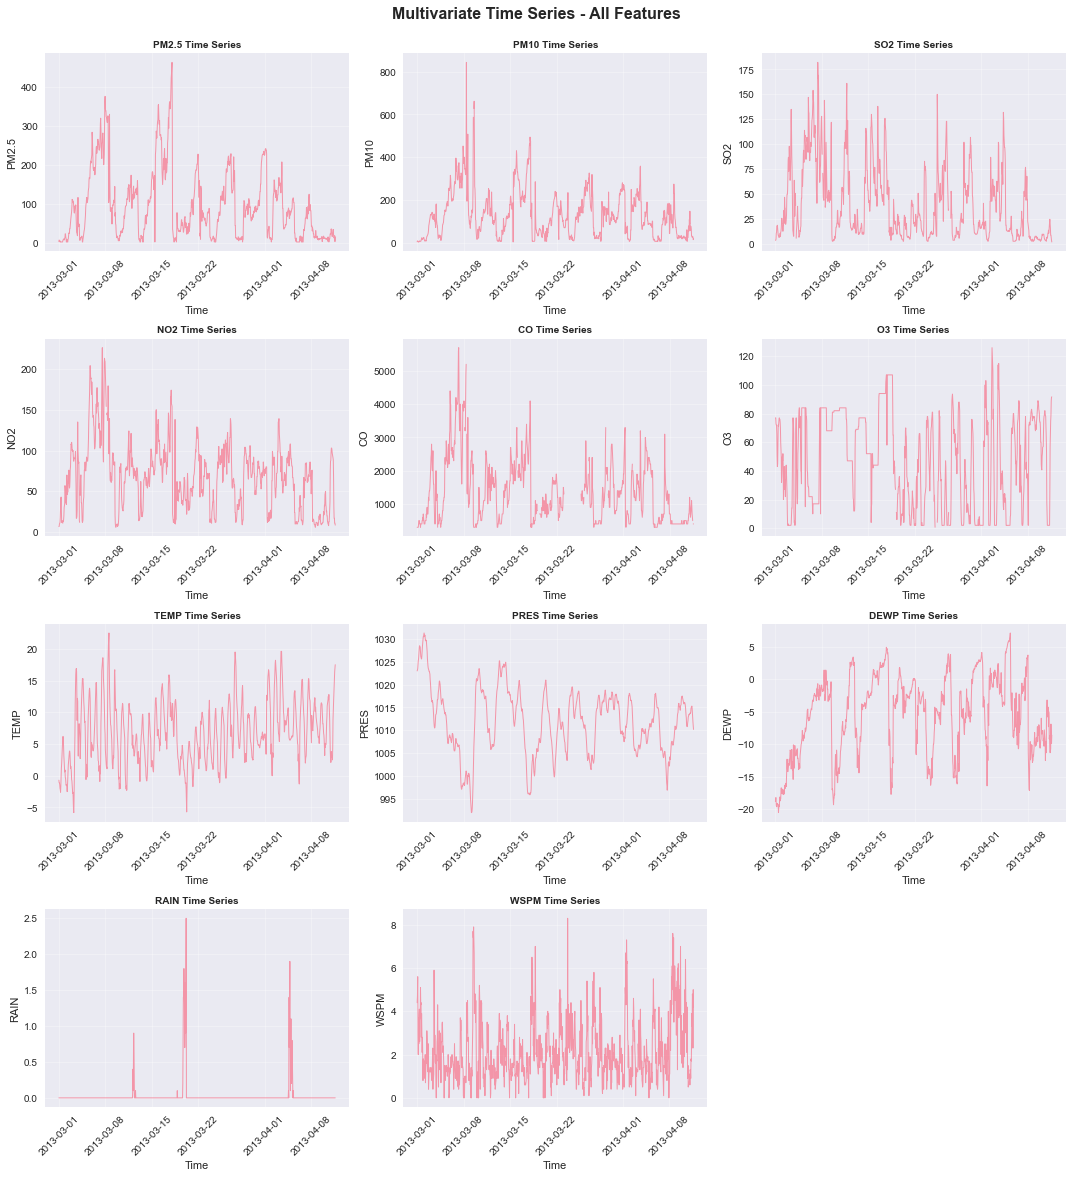


Creating correlation heatmap...


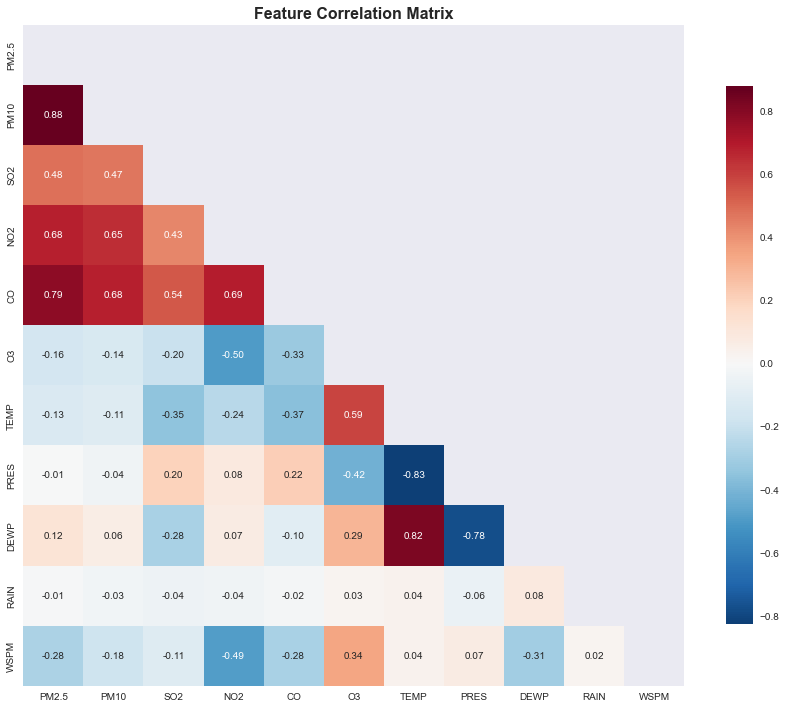


Creating target variable (PM2.5) analysis...


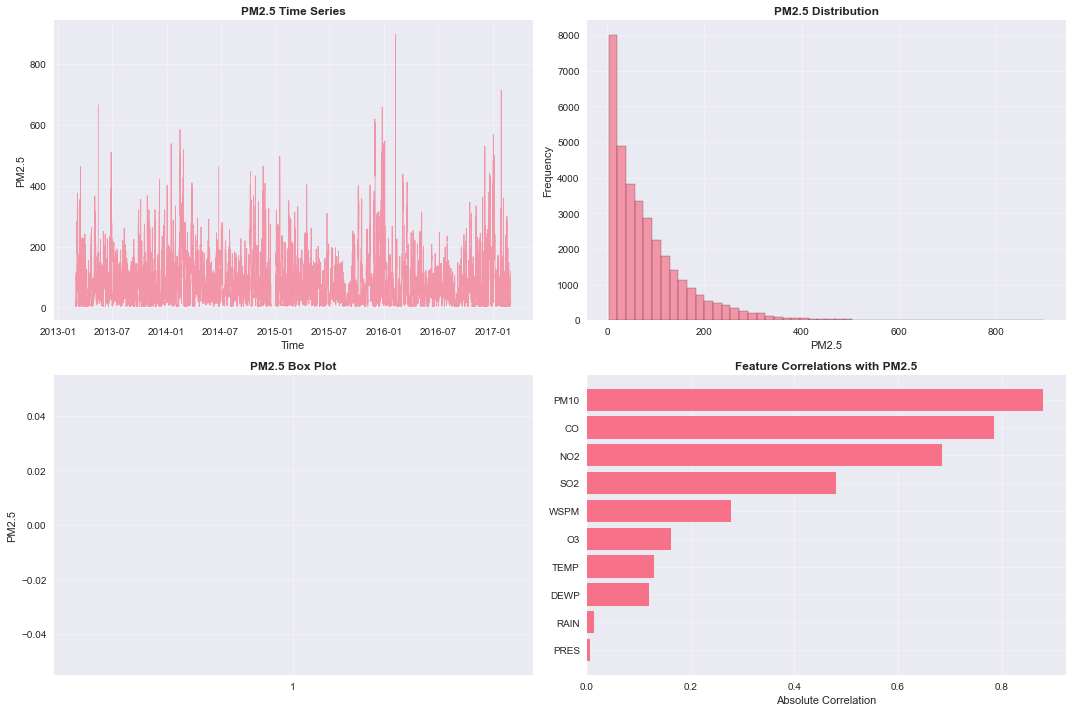


✅ Visualization completed!


In [5]:
# Cell 5: Data Visualization
print("=== DATA VISUALIZATION ===")

if 'df_features' in locals() and df_features is not None and not df_features.empty:
    # 1. Time series plots for all features
    print("Creating time series plots...")
    
    # Select a subset of data for visualization (first 1000 points for clarity)
    plot_data = df_features.head(1000)
    
    # Create subplots for time series
    numeric_cols = df_features.select_dtypes(include=[np.number]).columns
    n_features = len(numeric_cols)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            axes[i].plot(plot_data.index, plot_data[col], linewidth=1, alpha=0.7)
            axes[i].set_title(f'{col} Time Series', fontsize=10, fontweight='bold')
            axes[i].set_xlabel('Time')
            axes[i].set_ylabel(col)
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(True, alpha=0.3)
    
    # Hide unused subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Multivariate Time Series - All Features', fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    # 2. Correlation heatmap
    print("\nCreating correlation heatmap...")
    
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_features.corr()
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Create heatmap
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8})
    
    plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 3. Target variable analysis
    if target in df_features.columns:
        print(f"\nCreating target variable ({target}) analysis...")
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Time series plot
        axes[0, 0].plot(df_features.index, df_features[target], linewidth=0.8, alpha=0.7)
        axes[0, 0].set_title(f'{target} Time Series', fontweight='bold')
        axes[0, 0].set_xlabel('Time')
        axes[0, 0].set_ylabel(target)
        axes[0, 0].grid(True, alpha=0.3)
        
        # Distribution
        axes[0, 1].hist(df_features[target], bins=50, alpha=0.7, edgecolor='black')
        axes[0, 1].set_title(f'{target} Distribution', fontweight='bold')
        axes[0, 1].set_xlabel(target)
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Box plot
        axes[1, 0].boxplot(df_features[target])
        axes[1, 0].set_title(f'{target} Box Plot', fontweight='bold')
        axes[1, 0].set_ylabel(target)
        axes[1, 0].grid(True, alpha=0.3)
        
        # Correlation with other features
        if target in correlation_matrix.columns:
            target_corr = correlation_matrix[target].abs().sort_values(ascending=True)
            target_corr = target_corr[target_corr.index != target]  # Remove self-correlation
            
            axes[1, 1].barh(range(len(target_corr)), target_corr.values)
            axes[1, 1].set_yticks(range(len(target_corr)))
            axes[1, 1].set_yticklabels(target_corr.index)
            axes[1, 1].set_title(f'Feature Correlations with {target}', fontweight='bold')
            axes[1, 1].set_xlabel('Absolute Correlation')
            axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    print("\n✅ Visualization completed!")
    
else:
    print("❌ No data available for visualization")
    print("Please run the previous cells first")


In [6]:
# Cell 6: Time Series Split and Data Preparation
print("=== TIME SERIES SPLIT AND DATA PREPARATION ===")

if 'df_features' in locals() and df_features is not None and not df_features.empty:
    # Define time series splits for in-time and out-of-time samples
    print("Defining time series splits...")
    
    # Calculate split point (80% in-time, 20% out-of-time)
    total_length = len(df_features)
    split_point = int(total_length * 0.8)
    
    # Create splits
    in_time_data = df_features.iloc[:split_point].copy()
    out_of_time_data = df_features.iloc[split_point:].copy()
    
    print(f"Total observations: {total_length}")
    print(f"In-time sample: {len(in_time_data)} observations ({len(in_time_data)/total_length*100:.1f}%)")
    print(f"Out-of-time sample: {len(out_of_time_data)} observations ({len(out_of_time_data)/total_length*100:.1f}%)")
    
    print(f"In-time period: {in_time_data.index.min()} to {in_time_data.index.max()}")
    print(f"Out-of-time period: {out_of_time_data.index.min()} to {out_of_time_data.index.max()}")
    
    # Handle missing values
    print("\nHandling missing values...")
    
    # Check for missing values in each split
    in_time_missing = in_time_data.isnull().sum().sum()
    out_of_time_missing = out_of_time_data.isnull().sum().sum()
    
    print(f"In-time missing values: {in_time_missing}")
    print(f"Out-of-time missing values: {out_of_time_missing}")
    
    if in_time_missing > 0 or out_of_time_missing > 0:
        print("Applying forward fill for missing values...")
        in_time_data = in_time_data.fillna(method='ffill')
        out_of_time_data = out_of_time_data.fillna(method='ffill')
        
        # Check if any missing values remain
        remaining_missing = in_time_data.isnull().sum().sum() + out_of_time_data.isnull().sum().sum()
        if remaining_missing > 0:
            print("Applying backward fill for remaining missing values...")
            in_time_data = in_time_data.fillna(method='bfill')
            out_of_time_data = out_of_time_data.fillna(method='bfill')
        
        print(f"Missing values after treatment: {in_time_data.isnull().sum().sum() + out_of_time_data.isnull().sum().sum()}")
    else:
        print("✅ No missing values found")
    
    # Feature scaling (optional - for models that require it)
    print("\nPreparing data for modeling...")
    
    # Store original data
    in_time_original = in_time_data.copy()
    out_of_time_original = out_of_time_data.copy()
    
    # Create scaled versions for models that require normalization
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    
    # Fit scaler on in-time data only
    in_time_scaled = pd.DataFrame(
        scaler.fit_transform(in_time_data),
        index=in_time_data.index,
        columns=in_time_data.columns
    )
    
    # Transform out-of-time data using fitted scaler
    out_of_time_scaled = pd.DataFrame(
        scaler.transform(out_of_time_data),
        index=out_of_time_data.index,
        columns=out_of_time_data.columns
    )
    
    print("✅ Data scaling completed")
    print(f"Scaler fitted on: {len(in_time_data)} observations")
    print(f"Out-of-time data transformed using fitted scaler")
    
    # Prepare feature and target matrices
    print("\nPreparing feature and target matrices...")
    
    # Separate features and target
    feature_columns = [col for col in df_features.columns if col != target]
    
    if target in df_features.columns:
        # In-time data
        X_train = in_time_data[feature_columns]
        y_train = in_time_data[target]
        X_train_scaled = in_time_scaled[feature_columns]
        
        # Out-of-time data
        X_test = out_of_time_data[feature_columns]
        y_test = out_of_time_data[target]
        X_test_scaled = out_of_time_scaled[feature_columns]
        
        print(f"✅ Feature matrices prepared")
        print(f"Training features shape: {X_train.shape}")
        print(f"Training target shape: {y_train.shape}")
        print(f"Test features shape: {X_test.shape}")
        print(f"Test target shape: {y_test.shape}")
        
        # Feature names
        print(f"\nFeatures ({len(feature_columns)}): {feature_columns}")
        print(f"Target: {target}")
        
    else:
        print(f"❌ Target variable '{target}' not found in data")
        print(f"Available columns: {list(df_features.columns)}")
    
    # Save prepared data
    print("\nSaving prepared data...")
    
    # Create data directory if it doesn't exist
    data_dir = '../data_multivariate/'
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    # Save splits
    in_time_data.to_csv(f'{data_dir}in_time_features.csv')
    out_of_time_data.to_csv(f'{data_dir}out_of_time_features.csv')
    
    print(f"✅ Data splits saved to {data_dir}")
    print(f"   - in_time_features.csv ({len(in_time_data)} observations)")
    print(f"   - out_of_time_features.csv ({len(out_of_time_data)} observations)")
    
    print(f"\n✅ Time series split and data preparation completed!")
    
else:
    print("❌ No feature data available for time series split")
    print("Please run the previous cells first")


=== TIME SERIES SPLIT AND DATA PREPARATION ===
Defining time series splits...
Total observations: 35064
In-time sample: 28051 observations (80.0%)
Out-of-time sample: 7013 observations (20.0%)
In-time period: 2013-03-01 00:00:00 to 2016-05-12 18:00:00
Out-of-time period: 2016-05-12 19:00:00 to 2017-02-28 23:00:00

Handling missing values...
In-time missing values: 6274
Out-of-time missing values: 916
Applying forward fill for missing values...
Missing values after treatment: 0

Preparing data for modeling...
✅ Data scaling completed
Scaler fitted on: 28051 observations
Out-of-time data transformed using fitted scaler

Preparing feature and target matrices...
✅ Feature matrices prepared
Training features shape: (28051, 10)
Training target shape: (28051,)
Test features shape: (7013, 10)
Test target shape: (7013,)

Features (10): ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
Target: PM2.5

Saving prepared data...
✅ Data splits saved to ../data_multivariate/
  

In [7]:
# Cell 7: Summary and Next Steps
print("=== MULTIVARIATE DATA EXPLORATION COMPLETE ===")

if 'df_features' in locals() and df_features is not None and not df_features.empty:
    print("✅ Multivariate dataset loaded and analyzed")
    print(f"✅ Dataset: {dataset_info['name']}")
    print(f"✅ Station: {dataset_info['station']}")
    print(f"✅ Features: {len(feature_columns)} variables")
    print(f"✅ Target: {target}")
    print(f"✅ Time span: {df_features.index.min()} to {df_features.index.max()}")
    print(f"✅ Data quality assessed")
    print(f"✅ Time series splits defined (80/20)")
    print(f"✅ Data preprocessing completed")
    print(f"✅ Ready for multivariate time series analysis")
    
    print(f"\n=== NEXT STEPS ===")
    print("1. Proceed to 02_multivariate_time_series_analysis.ipynb")
    print("   - Time series decomposition for multiple variables")
    print("   - Stationarity testing for multivariate series")
    print("   - Cross-correlation analysis between features")
    print("   - Granger causality testing")
    
    print("\n2. Continue to 03_multivariate_model_training.ipynb")
    print("   - VAR (Vector Autoregression) models")
    print("   - VARMA (Vector ARMA) models")
    print("   - Machine learning models with multiple features")
    print("   - Deep learning approaches (LSTM, GRU)")
    
    print("\n3. Finish with 04_multivariate_model_evaluation.ipynb")
    print("   - Model comparison and selection")
    print("   - Ensemble methods for multivariate forecasting")
    print("   - Cross-validation for time series")
    print("   - Final model deployment recommendations")
    
    print(f"\n=== KEY INSIGHTS ===")
    if 'total_missing' in locals():
        print(f"• Data completeness: {len(df_features) / int((df_features.index.max() - df_features.index.min()).total_seconds() / 3600) * 100:.1f}%")
        print(f"• Missing values: {(total_missing/(len(df_features) * len(df_features.columns)))*100:.2f}%")
    
    if 'outlier_summary' in locals():
        print(f"• Outliers detected: {sum(outlier_summary.values())}")
    
    if 'correlation_matrix' in locals() and target in correlation_matrix.columns:
        target_correlations = correlation_matrix[target].abs().sort_values(ascending=False)
        top_features = target_correlations.head(3)[target_correlations.head(3).index != target]
        print(f"• Top correlated features with {target}:")
        for feature, corr in top_features.items():
            print(f"  - {feature}: {corr:.3f}")
    
    print(f"\n🎯 Ready to proceed with multivariate time series modeling!")
    
else:
    print("❌ Data exploration incomplete")
    print("Please ensure the dataset is loaded and processed correctly")
    print("Run all cells in order from Cell 1 to Cell 7")


=== MULTIVARIATE DATA EXPLORATION COMPLETE ===
✅ Multivariate dataset loaded and analyzed
✅ Dataset: Beijing Multi-Site Air-Quality Data - Aotizhongxin
✅ Station: Aotizhongxin
✅ Features: 10 variables
✅ Target: PM2.5
✅ Time span: 2013-03-01 00:00:00 to 2017-02-28 23:00:00
✅ Data quality assessed
✅ Time series splits defined (80/20)
✅ Data preprocessing completed
✅ Ready for multivariate time series analysis

=== NEXT STEPS ===
1. Proceed to 02_multivariate_time_series_analysis.ipynb
   - Time series decomposition for multiple variables
   - Stationarity testing for multivariate series
   - Cross-correlation analysis between features
   - Granger causality testing

2. Continue to 03_multivariate_model_training.ipynb
   - VAR (Vector Autoregression) models
   - VARMA (Vector ARMA) models
   - Machine learning models with multiple features
   - Deep learning approaches (LSTM, GRU)

3. Finish with 04_multivariate_model_evaluation.ipynb
   - Model comparison and selection
   - Ensemble meth